In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import pickle
from pathlib import Path
from itertools import product
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import seaborn as sns
import pandas as pd
from typing import Tuple, List, NewType
import matplotlib.ticker as mtick

Figure = NewType('Figure', matplotlib.figure.Figure)
Axis   = NewType('Figure', matplotlib.axes.Axes)

def heat_plot(X: np.array, size: Tuple[int] = None,
              x_tick_labels: List[str] = None,
              y_tick_labels: List[str] = None,
              cmap: str = None,
              cbar: bool = False,
              fig: Figure = None,
              ax: Axis = None) -> Tuple[Figure, Axis]:
    if fig == None and ax == None:
        fig, ax = plt.subplots(1, 1)
        if size != None:
            fig.set_size_inches(size)
        else:
            fig.set_size_inches(w = 15, h = 10)
    
    sns.heatmap(X, linewidth = 0, ax = ax, cmap = cmap, cbar = cbar)
    
    ax.locator_params('x', nbins = 3)
    ax.xaxis.set_major_formatter(mtick.FormatStrFormatter('%.0e'))
    
    if x_tick_labels != None:
        ax.set_xticklabels(x_tick_labels)
    if y_tick_labels != None:
        ax.set_yticklabels(y_tick_labels)
    
    return fig, ax

In [10]:
params = ('barabasi', 1000, 160, 5, 30, 0, 0, 0, 10, 2)
results = pickle.load(open(f"{'barabasi'}_{1000}_{160}_{5}_{30}_{0}_{0}_{0}_{10}_{2}_partial_results.pickle", "rb"))

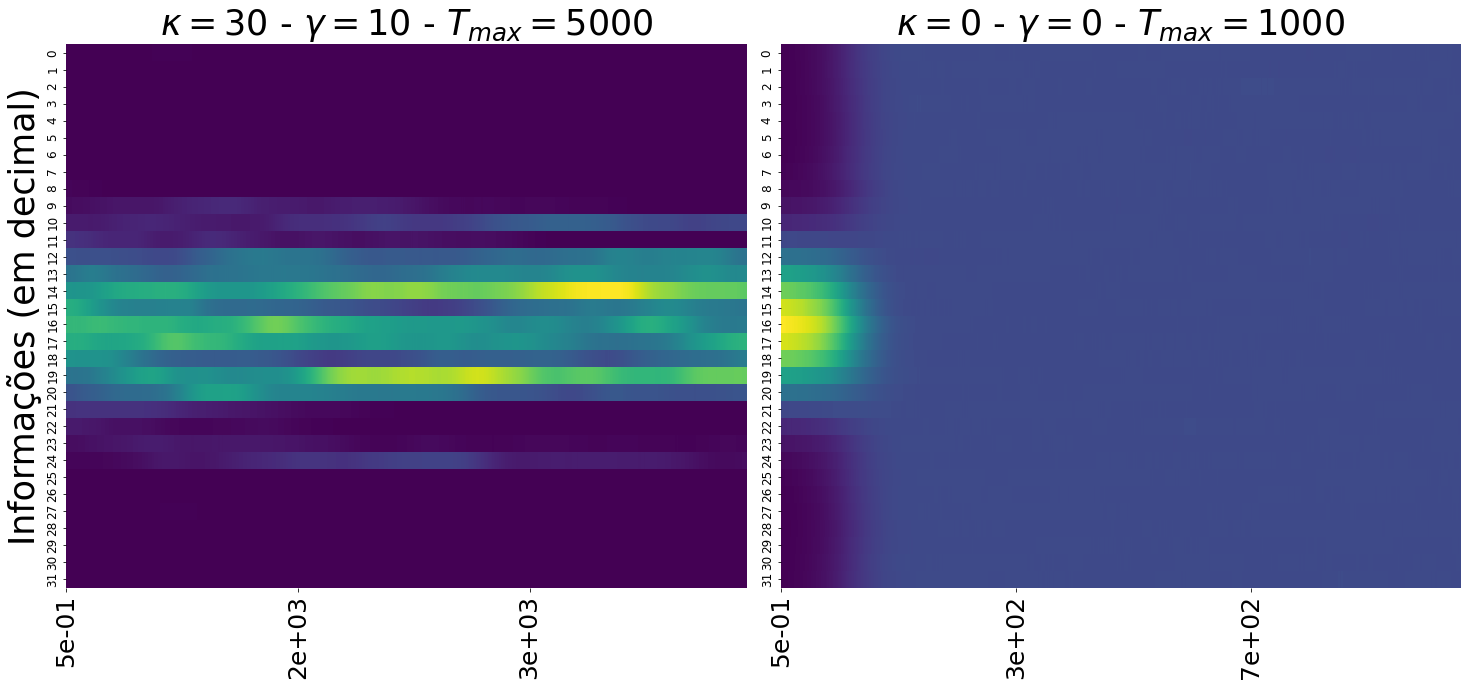

In [51]:
fig, axs = plt.subplots(nrows = 1, ncols = 2, figsize = (25, 10))
fig.subplots_adjust(wspace = 0.05)

params = ('barabasi', 1000, 160, 5, 30, 0, 0, 0, 10, 2)
results = pickle.load(open(f"{'barabasi'}_{1000}_{160}_{5}_{30}_{0}_{0}_{0}_{10}_{2}_partial_results.pickle", "rb"))
_results = results[params][0]['Distribution'].T
_, ax = heat_plot(_results, cmap = 'viridis', fig = fig, ax = axs[0])
ax.set_title(r"$\kappa = 30$ - $\gamma = 10$ - $T_{max} = 5000$", fontsize = 35)
del(results)

params = ('barabasi', 1000, 160, 5, 15, 0, 0, 0, 0, 2)
results = pickle.load(open(f"{'barabasi'}_{1000}_{160}_{5}_{15}_{0}_{0}_{0}_{0}_{2}_partial_results.pickle", "rb"))
_results = results[params][0]['Distribution'].T
_, ax = heat_plot(_results[:, :1000], cmap = 'viridis', fig = fig, ax = axs[1])
ax.set_title(r"$\kappa = 0$ - $\gamma = 0$ - $T_{max} = 1000$", fontsize = 35)
del(results)

axs[0].set_ylabel("Informações (em decimal)", fontsize = 35)
for ax in axs:
    ax.tick_params(axis='y', which='major', labelsize=12)
    ax.tick_params(axis='x', which='major', labelsize=25)

fig.savefig("evolucao_dist_probabilidade.png", bbox_inches='tight')

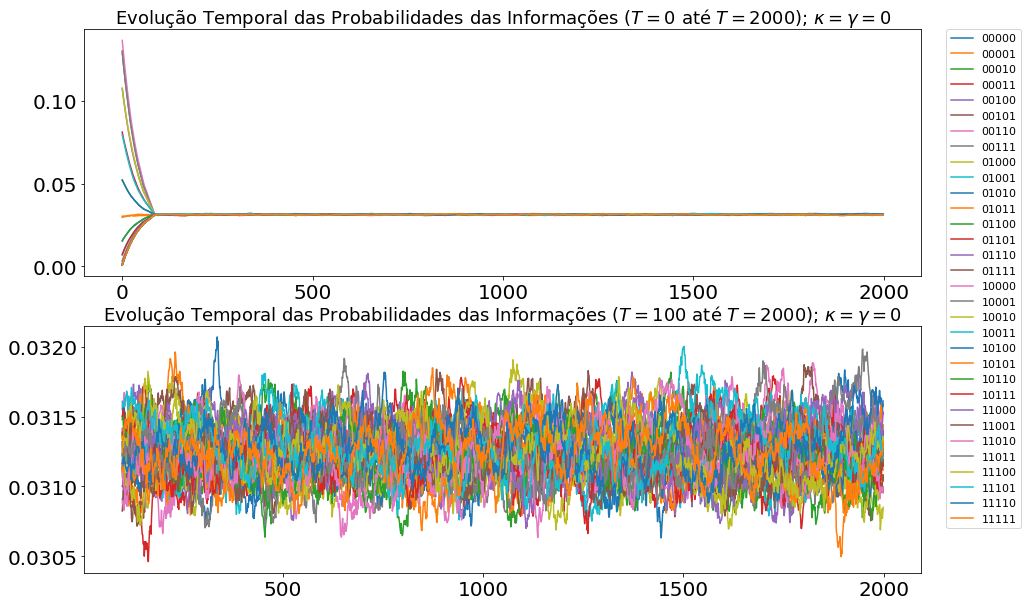

In [52]:
fig, axs = plt.subplots(ncols = 1, nrows = 2, figsize = (15, 10))
for ax in axs:
    ax.locator_params(axis='x', nbins=5)
    ax.locator_params(axis='y', nbins=5)
    ax.tick_params(axis='both', which='major', labelsize=20)
    ax.tick_params(axis='both', which='minor', labelsize=20)

getbinary = lambda x, n: format(x, 'b').zfill(n)

params = ('barabasi', 1000, 160, 5, 0, 0, 0, 0, 0, 2)
results = pickle.load(open(f"{'barabasi'}_{1000}_{160}_{5}_{0}_{0}_{0}_{0}_{0}_{2}_partial_results.pickle", "rb"))
_results = results[params][0]['Distribution'].T
X = np.arange(_results.shape[1])

for k in range(len(_results)):
    axs[0].plot(X[:2000], _results[k][:2000], label = f"{getbinary(k, 5)}")
    
axs[0].legend(fontsize = 11, loc = (1.03, -1.02))
axs[0].set_title(rf"Evolução Temporal das Probabilidades das Informações ($T = 0$ até $T = 2000$); $\kappa = \gamma = 0$", fontsize = 18)
    
params = ('barabasi', 1000, 160, 5, 0, 0, 0, 0, 0, 2)
results = pickle.load(open(f"{'barabasi'}_{1000}_{160}_{5}_{0}_{0}_{0}_{0}_{0}_{2}_partial_results.pickle", "rb"))
_results = results[params][0]['Distribution'].T
X = np.arange(_results.shape[1])[100:2000]

for k in range(len(_results)):
    axs[1].plot(X, _results[k][100:2000], label = f"{k}")
    
axs[1].set_title(rf"Evolução Temporal das Probabilidades das Informações ($T = 100$ até $T = 2000$); $\kappa = \gamma = 0$", fontsize = 18)

fig.savefig("curvas_evolucao_dist_probabilidade.png", bbox_inches='tight')

In [33]:
params = ('barabasi', 1000, 160, 5, 0, 0, 0, 0, 0, 2)
results = pickle.load(open(f"{'barabasi'}_{1000}_{160}_{5}_{0}_{0}_{0}_{0}_{0}_{2}_partial_results.pickle", "rb"))
_results = results[params][0]['Distribution'].T
seg = _results[k][100:2000]
print(np.mean(seg))
print(np.std(seg))

0.0312527
0.0001900885384083179


In [54]:
import seaborn as sns
sns.set_context("poster")

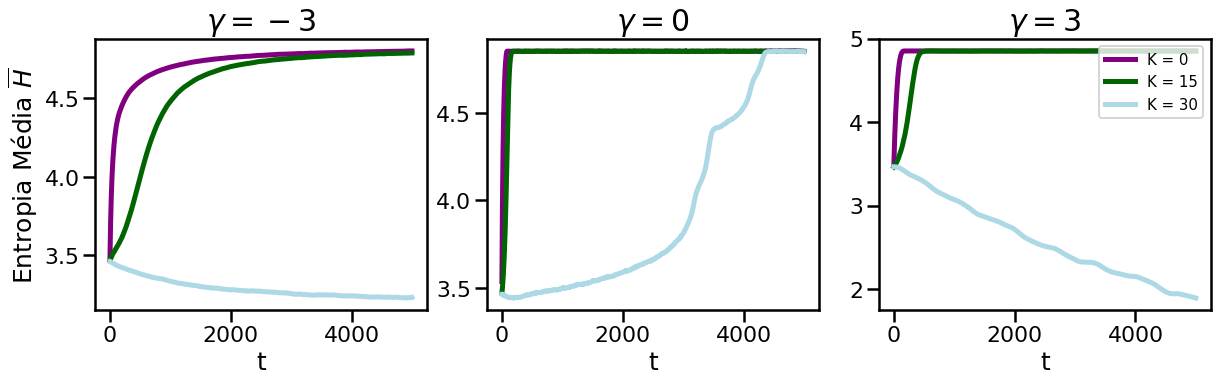

In [61]:
fig, axs = plt.subplots(nrows = 1, ncols = 3, figsize = (20, 5))
fig.subplots_adjust(wspace = 0.18)
for ax in axs:
#     # ax.locator_params(axis='x', nbins=5)
#     # ax.locator_params(axis='y', nbins=5)
#     ax.tick_params(axis='both', which='major', labelsize=15)
#     ax.tick_params(axis='both', which='minor', labelsize=15)
    ax.set_xlabel("t", fontsize = 25)
    
colors = {
    0: "purple",
    15: "darkgreen",
    30: "lightblue",
}
kappas = [0, 15, 30]
gammas = [-3, 0, 3]
axs = axs.reshape(-1)

axs[0].set_ylabel(r"Entropia Média $\overline{H}$", fontsize = 25)
for i in range(len(gammas)):
    ax = axs[i]
    for j in range(len(kappas)):
        
        params = ('barabasi', 1000, 160, 5, kappas[j], 0, 0, 0, gammas[i], 2)
        
        results = pickle.load(open(f"{'barabasi'}_{1000}_{160}_{5}_{kappas[j]}_{0}_{0}_{0}_{gammas[i]}_{2}_partial_results.pickle", "rb"))
        mean_entropy = results[params][0]['Entropy']
        X = range(len(mean_entropy))
        
        ax.plot(X, mean_entropy, label = f'K = {kappas[j]}', color = colors[kappas[j]], linewidth = 5)
        
        ax.set_title(rf"$\gamma = {gammas[i]}$", fontsize = 30)
        if gammas[i] == 3:
            ax.legend(fontsize = 15, loc = 1)
            
fig.savefig("curvas_evolucao_entropia_barabasi.png", bbox_inches='tight')

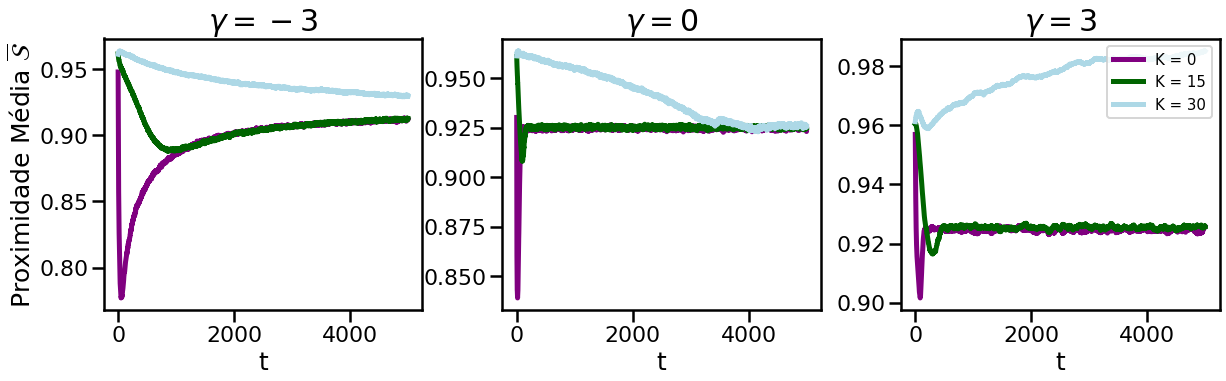

In [62]:
fig, axs = plt.subplots(nrows = 1, ncols = 3, figsize = (20, 5))
fig.subplots_adjust(wspace = 0.25)
for ax in axs:
#     # ax.locator_params(axis='x', nbins=5)
#     # ax.locator_params(axis='y', nbins=5)
#     ax.tick_params(axis='both', which='major', labelsize=15)
#     ax.tick_params(axis='both', which='minor', labelsize=15)
    ax.set_xlabel("t", fontsize = 25)
    
colors = {
    0: "purple",
    15: "darkgreen",
    30: "lightblue",
}
kappas = [0, 15, 30]
gammas = [-3, 0, 3]
axs = axs.reshape(-1)

axs[0].set_ylabel(r"Proximidade Média $\overline{\mathcal{S}}$", fontsize = 25)
for i in range(len(gammas)):
    ax = axs[i]
    for j in range(len(kappas)):
        
        params = ('barabasi', 1000, 160, 5, kappas[j], 0, 0, 0, gammas[i], 2)
        
        results = pickle.load(open(f"{'barabasi'}_{1000}_{160}_{5}_{kappas[j]}_{0}_{0}_{0}_{gammas[i]}_{2}_partial_results.pickle", "rb"))
        mean_proximity = results[params][0]['Proximity']
        X = range(len(mean_proximity))
        
        ax.plot(X, mean_proximity, label = f'K = {kappas[j]}', color = colors[kappas[j]], linewidth = 5)
        
        ax.set_title(rf"$\gamma = {gammas[i]}$", fontsize = 30)
        if gammas[i] == 3:
            ax.legend(fontsize = 15, loc = 1)
            
fig.savefig("curvas_evolucao_proximidade_barabasi.png", bbox_inches='tight')